In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
SPX = pd.read_csv('SPX.csv', names = ['time', 'SPX_open', 'SPX_high', 'SPX_low', 'SPX_close'])
AAPL_pr = pd.read_csv('AAPL_pr.csv', 
                   names = ['time', 'AAPL_open', 'AAPL_high', 'AAPL_low', 'AAPL_close', 'AAPL_vol'],
                   index_col = None)
AMZN_pr = pd.read_csv('AMZN_pr.csv', 
                   names = ['time', 'AMZN_open', 'AMZN_high', 'AMZN_low', 'AMZN_close', 'AMZN_vol'])
MSFT_pr = pd.read_csv('MSFT_pr.csv', 
                   names = ['time', 'MSFT_open', 'MSFT_high', 'MSFT_low', 'MSFT_close', 'MSFT_vol'])
FB_pr = pd.read_csv('FB_pr.csv', 
                 names = ['time', 'FB_open', 'FB_high', 'FB_low', 'FB_close', 'FB_vol'])
TSLA_pr = pd.read_csv('TSLA_pr.csv', 
                   names = ['time', 'TSLA_open', 'TSLA_high', 'TSLA_low', 'TSLA_close', 'TSLA_vol'])

In [5]:
AAPL_pr.head()

,time,AAPL_open,AAPL_high,AAPL_low,AAPL_close,AAPL_vol
0,2019-01-02 04:00:00,154.40,154.40,153.01,154.0,3021
1,2019-01-02 04:01:00,154.00,154.00,154.00,154.0,110
2,2019-01-02 04:03:00,154.01,154.01,154.00,154.0,200
3,2019-01-02 04:04:00,154.00,154.00,154.00,154.0,472
4,2019-01-02 04:05:00,154.33,154.33,154.00,154.0,1192


In [6]:
print(len(AAPL_pr))
print(len(SPX))

163992
97740


In [7]:
AAPL_pr['time'] = AAPL_pr['time'].apply(lambda x: x.replace('-', '.'))

prices = pd.merge(SPX, AAPL_pr, on = 'time', how = 'inner', sort = False)

In [8]:
prices.head()

,time,SPX_open,SPX_high,SPX_low,SPX_close,AAPL_open,AAPL_high,AAPL_low,AAPL_close,AAPL_vol
0,2019.01.02 09:30:00,2476.96,2476.96,2470.98,2470.40,154.89,155.25,154.53,154.7800,685823
1,2019.01.02 09:31:00,2470.80,2474.09,2473.70,2470.80,154.79,155.55,154.78,155.1597,158277
2,2019.01.02 09:32:00,2473.56,2473.56,2471.44,2471.26,155.18,155.30,154.77,154.8073,155007
3,2019.01.02 09:33:00,2471.30,2472.88,2471.67,2469.64,154.83,154.90,154.58,154.6700,170003
4,2019.01.02 09:34:00,2471.88,2472.49,2471.04,2470.11,154.63,155.00,154.62,154.7500,146408


In [9]:
print(len(prices))

84444


In [10]:
prices['time'] = prices['time'].apply(lambda x: pd.Timestamp(ts_input = x, tz = 'US/Eastern'))
prices['AAPL-1'] = prices['AAPL_open'].shift(periods = 1)
prices['AAPL-2'] = prices['AAPL_open'].shift(periods = 2)

In [11]:
y = prices[1:]['AAPL_open']
X = prices[1:][['SPX_open', 'AAPL-1']]
X = sm.add_constant(X)

In [12]:
mod_normal_ret = sm.OLS(y, X)

In [13]:
res = mod_normal_ret.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              AAPL_open   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.395e+08
Date:                Thu, 01 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:52:30   Log-Likelihood:                 31980.
No. Observations:               84443   AIC:                        -6.395e+04
Df Residuals:                   84440   BIC:                        -6.393e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0815      0.023     -3.594      0.0

In [16]:
AAPL_news = pd.read_excel('AAPL.xlsx', index_col = 0)

In [17]:
AAPL_news.head()

,Article,time,ticker
0,"TAIPEI, March 30 (Reuters) - Taiwan’s Foxconn,...","('March 30, 2021', '8:59 AM')",AAPL
1,NEW YORK (Reuters) - New York's Department of ...,"('March 23, 2021', '3:58 PM')",AAPL
2,The California Institute of Technology sued Mi...,"('March 22, 2021', '8:53 PM')",AAPL
3,(Reuters) - A federal jury in Texas said Apple...,"('March 20, 2021', '5:47 AM')",AAPL
4,(Reuters) - Apple Inc and Epic Games have list...,"('March 20, 2021', '10:05 AM')",AAPL


In [18]:
ts = AAPL_news.iloc[4][1]
lis = ts.split("'")
print(lis[-2])

10:05 AM


In [19]:
print(ts[20], ts[-22:-20])


1 20


In [20]:
def day(ts):
    l = ts.split("'")
    return l[1]

def hour(ts):
    l = ts.split("'")
    return l[-2]

In [21]:
AAPL_news['day'] = AAPL_news['time'].apply(day)

In [22]:
AAPL_news['hour'] = AAPL_news['time'].apply(hour)

In [23]:
AAPL_news.head()

,Article,time,ticker,day,hour
0,"TAIPEI, March 30 (Reuters) - Taiwan’s Foxconn,...","('March 30, 2021', '8:59 AM')",AAPL,"March 30, 2021",8:59 AM
1,NEW YORK (Reuters) - New York's Department of ...,"('March 23, 2021', '3:58 PM')",AAPL,"March 23, 2021",3:58 PM
2,The California Institute of Technology sued Mi...,"('March 22, 2021', '8:53 PM')",AAPL,"March 22, 2021",8:53 PM
3,(Reuters) - A federal jury in Texas said Apple...,"('March 20, 2021', '5:47 AM')",AAPL,"March 20, 2021",5:47 AM
4,(Reuters) - Apple Inc and Epic Games have list...,"('March 20, 2021', '10:05 AM')",AAPL,"March 20, 2021",10:05 AM


In [24]:
def year(day):
    l = day.split(' ')
    return l[-1]

def good_day(day):
    l = day.split(' ')
    return l[1][:-1]

def month(day):
    l = day.split(' ')
    NewDictionary = {"January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6, "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12}
    return NewDictionary[l[0]]

In [25]:
AAPL_news['year'] = AAPL_news['day'].apply(year)
AAPL_news['month'] = AAPL_news['day'].apply(month)
AAPL_news['day'] = AAPL_news['day'].apply(good_day)

In [26]:
AAPL_news

,Article,time,ticker,day,hour,year,month
0,"TAIPEI, March 30 (Reuters) - Taiwan’s Foxconn,...","('March 30, 2021', '8:59 AM')",AAPL,30,8:59 AM,2021,3
1,NEW YORK (Reuters) - New York's Department of ...,"('March 23, 2021', '3:58 PM')",AAPL,23,3:58 PM,2021,3
2,The California Institute of Technology sued Mi...,"('March 22, 2021', '8:53 PM')",AAPL,22,8:53 PM,2021,3
3,(Reuters) - A federal jury in Texas said Apple...,"('March 20, 2021', '5:47 AM')",AAPL,20,5:47 AM,2021,3
4,(Reuters) - Apple Inc and Epic Games have list...,"('March 20, 2021', '10:05 AM')",AAPL,20,10:05 AM,2021,3
...,...,...,...,...,...,...,...
1772,DUBLIN (Reuters) - Ireland on Friday chose Amu...,"('March 23, 2018', '2:12 PM')",AAPL,23,2:12 PM,2018,3
1773,(Reuters) - Semiconductor component manufactur...,"('March 20, 2018', '3:30 PM')",AAPL,20,3:30 PM,2018,3
1774,(Reuters) - Most Android phones will have to w...,"('March 20, 2018', '7:08 AM')",AAPL,20,7:08 AM,2018,3
1775,(Reuters) - Apple Inc is developing its own Mi...,"('March 19, 2018', '3:40 AM')",AAPL,19,3:40 AM,2018,3


In [27]:
asd = AAPL_news.iloc[0][4]
asd.split(':')[0]

'8'

In [28]:
def good_hour(hour):
    l = hour.split(':')
    A_F = l[-1].split(' ')[-1]
    if A_F == 'AM':
        return l[0]
    elif A_F == 'PM' and l[0] == '12':
        return '0'
    
    else:
        return str(int(l[0]) + 12)

def minute(hour):
    l = hour.split(':')[-1]
    return l.split(' ')[0]

In [29]:
AAPL_news['minute'] = AAPL_news['hour'].apply(minute)
AAPL_news['hour'] = AAPL_news['hour'].apply(good_hour)

In [30]:
AAPL_news

,Article,time,ticker,day,hour,year,month,minute
0,"TAIPEI, March 30 (Reuters) - Taiwan’s Foxconn,...","('March 30, 2021', '8:59 AM')",AAPL,30,8,2021,3,59
1,NEW YORK (Reuters) - New York's Department of ...,"('March 23, 2021', '3:58 PM')",AAPL,23,15,2021,3,58
2,The California Institute of Technology sued Mi...,"('March 22, 2021', '8:53 PM')",AAPL,22,20,2021,3,53
3,(Reuters) - A federal jury in Texas said Apple...,"('March 20, 2021', '5:47 AM')",AAPL,20,5,2021,3,47
4,(Reuters) - Apple Inc and Epic Games have list...,"('March 20, 2021', '10:05 AM')",AAPL,20,10,2021,3,05
...,...,...,...,...,...,...,...,...
1772,DUBLIN (Reuters) - Ireland on Friday chose Amu...,"('March 23, 2018', '2:12 PM')",AAPL,23,14,2018,3,12
1773,(Reuters) - Semiconductor component manufactur...,"('March 20, 2018', '3:30 PM')",AAPL,20,15,2018,3,30
1774,(Reuters) - Most Android phones will have to w...,"('March 20, 2018', '7:08 AM')",AAPL,20,7,2018,3,08
1775,(Reuters) - Apple Inc is developing its own Mi...,"('March 19, 2018', '3:40 AM')",AAPL,19,3,2018,3,40


In [31]:
AAPL_news['time_good'] = AAPL_news.apply(lambda x: pd.Timestamp(year = int(x[5]),
                                                                month = int(x[6]), day = int(x[3]),
                                                                hour = int(x[4]), minute = int(x[7]), tz = 'Europe/Athens'), 
                                         axis = 1)

In [32]:
AAPL = AAPL_news[['time_good', 'Article', 'ticker']]

In [33]:
AAPL['time_tz'] = AAPL['time_good'].apply(lambda x: x.tz_convert('US/Eastern'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
AAPL

,time_good,Article,ticker,time_tz
0,2021-03-30 08:59:00+03:00,"TAIPEI, March 30 (Reuters) - Taiwan’s Foxconn,...",AAPL,2021-03-30 01:59:00-04:00
1,2021-03-23 15:58:00+02:00,NEW YORK (Reuters) - New York's Department of ...,AAPL,2021-03-23 09:58:00-04:00
2,2021-03-22 20:53:00+02:00,The California Institute of Technology sued Mi...,AAPL,2021-03-22 14:53:00-04:00
3,2021-03-20 05:47:00+02:00,(Reuters) - A federal jury in Texas said Apple...,AAPL,2021-03-19 23:47:00-04:00
4,2021-03-20 10:05:00+02:00,(Reuters) - Apple Inc and Epic Games have list...,AAPL,2021-03-20 04:05:00-04:00
...,...,...,...,...
1772,2018-03-23 14:12:00+02:00,DUBLIN (Reuters) - Ireland on Friday chose Amu...,AAPL,2018-03-23 08:12:00-04:00
1773,2018-03-20 15:30:00+02:00,(Reuters) - Semiconductor component manufactur...,AAPL,2018-03-20 09:30:00-04:00
1774,2018-03-20 07:08:00+02:00,(Reuters) - Most Android phones will have to w...,AAPL,2018-03-20 01:08:00-04:00
1775,2018-03-19 03:40:00+02:00,(Reuters) - Apple Inc is developing its own Mi...,AAPL,2018-03-18 21:40:00-04:00


In [35]:
oldest = min(prices['time'])
newest = max(prices['time'])

In [36]:
def valid(oldest, newest, time):
    return (time > oldest and time < newest)

In [37]:
AAPL['valid'] = AAPL['time_tz'].apply(lambda x: valid(oldest, newest, x))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
AAPL_val = AAPL[AAPL['valid'] == True]

In [39]:
AAPL_val

,time_good,Article,ticker,time_tz,valid
798,2019-11-07 16:28:00+02:00,LISBON (Reuters) - Apple Pay has attracted reg...,AAPL,2019-11-07 09:28:00-05:00,True
799,2019-11-07 16:20:00+02:00,"LISBON, Nov 7 (Reuters) - Europe’s antitrust c...",AAPL,2019-11-07 09:20:00-05:00,True
800,2019-11-07 03:08:00+02:00,(Reuters) - Qualcomm Inc said on Wednesday it ...,AAPL,2019-11-06 20:08:00-05:00,True
801,2019-11-06 23:15:00+02:00,(Reuters) - Qualcomm Inc QCOM.O on Wednesday f...,AAPL,2019-11-06 16:15:00-05:00,True
802,2019-11-06 16:23:00+02:00,(Reuters) - Apple Inc on Wednesday said that U...,AAPL,2019-11-06 09:23:00-05:00,True
...,...,...,...,...,...
1322,2019-01-03 04:57:00+02:00,Jan 2 (Reuters) - Billionaire Warren Buffett h...,AAPL,2019-01-02 21:57:00-05:00,True
1324,2019-01-03 02:52:00+02:00,"SHANGHAI, Jan 3 (Reuters) - Shares in Asia fel...",AAPL,2019-01-02 19:52:00-05:00,True
1325,2019-01-03 01:38:00+02:00,NEW YORK (Reuters Breakingviews) - Apple’s war...,AAPL,2019-01-02 18:38:00-05:00,True
1326,2019-01-02 17:15:00+02:00,NEW YORK (Reuters) - Yields on long-dated U.S....,AAPL,2019-01-02 10:15:00-05:00,True


In [40]:
prices['SPX-1'] = prices['SPX_open'].shift(periods = 1)

In [41]:
prices_less = prices[2:]

In [42]:
prices_less['R_t'] = (prices_less['AAPL_open'] - prices_less['AAPL-1']) / prices_less['AAPL-1']
prices_less['R_t-1'] = (prices_less['AAPL-1'] - prices_less['AAPL-2']) / prices_less['AAPL-2']
prices_less['R_m'] = (prices_less['SPX_open'] - prices_less['SPX-1']) / prices_less['SPX-1']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [43]:
prices_less.head()

,time,SPX_open,SPX_high,SPX_low,SPX_close,AAPL_open,AAPL_high,AAPL_low,AAPL_close,AAPL_vol,AAPL-1,AAPL-2,SPX-1,R_t,R_t-1,R_m
2,2019-01-02 09:32:00-05:00,2473.56,2473.56,2471.44,2471.26,155.18,155.3,154.77,154.8073,155007,154.79,154.89,2470.80,0.002520,-0.000646,0.001117
3,2019-01-02 09:33:00-05:00,2471.30,2472.88,2471.67,2469.64,154.83,154.9,154.58,154.6700,170003,155.18,154.79,2473.56,-0.002255,0.002520,-0.000914
4,2019-01-02 09:34:00-05:00,2471.88,2472.49,2471.04,2470.11,154.63,155.0,154.62,154.7500,146408,154.83,155.18,2471.30,-0.001292,-0.002255,0.000235
5,2019-01-02 09:35:00-05:00,2471.06,2471.32,2468.78,2467.47,154.78,154.8,154.30,154.5300,218226,154.63,154.83,2471.88,0.000970,-0.001292,-0.000332
6,2019-01-02 09:36:00-05:00,2468.84,2471.80,2471.80,2468.84,154.51,155.0,154.49,154.9590,179486,154.78,154.63,2471.06,-0.001744,0.000970,-0.000898


In [44]:
y = prices_less['R_t']
X = sm.add_constant(prices_less[['R_t-1', 'R_m']])

In [45]:
mod_normal_ret = sm.OLS(y, X)

res = mod_normal_ret.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    R_t   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                 3.465e+04
Date:                Thu, 01 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:53:21   Log-Likelihood:             5.0064e+05
No. Observations:               84442   AIC:                        -1.001e+06
Df Residuals:                   84439   BIC:                        -1.001e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.584e-06   2.22e-06      1.166      0.2

In [46]:
a = ['c1', 'a_R_t-1', 'a_R_m']
Norm_ret_params = {a[i]: res.params[i] for i in range(3)}

In [47]:
Norm_ret_params

{'a_R_m': 1.597405081398794,
 'a_R_t-1': -0.06338099129318064,
 'c1': 2.583930399502345e-06}

In [48]:
AAPL

,time_good,Article,ticker,time_tz,valid
0,2021-03-30 08:59:00+03:00,"TAIPEI, March 30 (Reuters) - Taiwan’s Foxconn,...",AAPL,2021-03-30 01:59:00-04:00,False
1,2021-03-23 15:58:00+02:00,NEW YORK (Reuters) - New York's Department of ...,AAPL,2021-03-23 09:58:00-04:00,False
2,2021-03-22 20:53:00+02:00,The California Institute of Technology sued Mi...,AAPL,2021-03-22 14:53:00-04:00,False
3,2021-03-20 05:47:00+02:00,(Reuters) - A federal jury in Texas said Apple...,AAPL,2021-03-19 23:47:00-04:00,False
4,2021-03-20 10:05:00+02:00,(Reuters) - Apple Inc and Epic Games have list...,AAPL,2021-03-20 04:05:00-04:00,False
...,...,...,...,...,...
1772,2018-03-23 14:12:00+02:00,DUBLIN (Reuters) - Ireland on Friday chose Amu...,AAPL,2018-03-23 08:12:00-04:00,False
1773,2018-03-20 15:30:00+02:00,(Reuters) - Semiconductor component manufactur...,AAPL,2018-03-20 09:30:00-04:00,False
1774,2018-03-20 07:08:00+02:00,(Reuters) - Most Android phones will have to w...,AAPL,2018-03-20 01:08:00-04:00,False
1775,2018-03-19 03:40:00+02:00,(Reuters) - Apple Inc is developing its own Mi...,AAPL,2018-03-18 21:40:00-04:00,False


In [49]:
AAPL_val['start'] = AAPL['time_tz'] - pd.Timedelta(hours = 1)
AAPL_val['end'] = AAPL['time_tz'] + pd.Timedelta(hours = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [50]:
AAPL_val.head()

,time_good,Article,ticker,time_tz,valid,start,end
798,2019-11-07 16:28:00+02:00,LISBON (Reuters) - Apple Pay has attracted reg...,AAPL,2019-11-07 09:28:00-05:00,True,2019-11-07 08:28:00-05:00,2019-11-07 10:28:00-05:00
799,2019-11-07 16:20:00+02:00,"LISBON, Nov 7 (Reuters) - Europe’s antitrust c...",AAPL,2019-11-07 09:20:00-05:00,True,2019-11-07 08:20:00-05:00,2019-11-07 10:20:00-05:00
800,2019-11-07 03:08:00+02:00,(Reuters) - Qualcomm Inc said on Wednesday it ...,AAPL,2019-11-06 20:08:00-05:00,True,2019-11-06 19:08:00-05:00,2019-11-06 21:08:00-05:00
801,2019-11-06 23:15:00+02:00,(Reuters) - Qualcomm Inc QCOM.O on Wednesday f...,AAPL,2019-11-06 16:15:00-05:00,True,2019-11-06 15:15:00-05:00,2019-11-06 17:15:00-05:00
802,2019-11-06 16:23:00+02:00,(Reuters) - Apple Inc on Wednesday said that U...,AAPL,2019-11-06 09:23:00-05:00,True,2019-11-06 08:23:00-05:00,2019-11-06 10:23:00-05:00


In [51]:
prices_less

,time,SPX_open,SPX_high,SPX_low,SPX_close,AAPL_open,AAPL_high,AAPL_low,AAPL_close,AAPL_vol,AAPL-1,AAPL-2,SPX-1,R_t,R_t-1,R_m
2,2019-01-02 09:32:00-05:00,2473.56,2473.56,2471.44,2471.26,155.18,155.30,154.77,154.8073,155007,154.79,154.89,2470.80,0.002520,-0.000646,0.001117
3,2019-01-02 09:33:00-05:00,2471.30,2472.88,2471.67,2469.64,154.83,154.90,154.58,154.6700,170003,155.18,154.79,2473.56,-0.002255,0.002520,-0.000914
4,2019-01-02 09:34:00-05:00,2471.88,2472.49,2471.04,2470.11,154.63,155.00,154.62,154.7500,146408,154.83,155.18,2471.30,-0.001292,-0.002255,0.000235
5,2019-01-02 09:35:00-05:00,2471.06,2471.32,2468.78,2467.47,154.78,154.80,154.30,154.5300,218226,154.63,154.83,2471.88,0.000970,-0.001292,-0.000332
6,2019-01-02 09:36:00-05:00,2468.84,2471.80,2471.80,2468.84,154.51,155.00,154.49,154.9590,179486,154.78,154.63,2471.06,-0.001744,0.000970,-0.000898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84439,2019-11-08 15:55:00-05:00,3090.65,3090.80,3090.69,3089.99,259.97,260.44,259.91,259.9216,265226,259.98,259.89,3089.69,-0.000038,0.000346,0.000311
84440,2019-11-08 15:56:00-05:00,3090.70,3090.76,3090.73,3090.05,259.92,259.98,259.88,259.9150,95948,259.97,259.98,3090.65,-0.000192,-0.000038,0.000016
84441,2019-11-08 15:57:00-05:00,3090.74,3091.02,3090.69,3090.52,259.92,259.95,259.80,259.8200,93800,259.92,259.97,3090.70,0.000000,-0.000192,0.000013
84442,2019-11-08 15:58:00-05:00,3090.70,3091.13,3091.02,3090.58,259.82,259.89,259.80,259.8800,112397,259.92,259.92,3090.74,-0.000385,0.000000,-0.000013


In [52]:
def CAR(start, end, dataframe):
    inside = dataframe.copy()
    important = inside[(inside['time'] >= start) & (inside['time'] <= end)]
    important['AR'] = important['R_t'] - Norm_ret_params['c1'] - Norm_ret_params['a_R_t-1'] * important['R_t-1'] - Norm_ret_params['a_R_m'] * important['R_m']
    CAR = np.sum(important['AR'])
    return CAR

In [53]:
beg = AAPL_val.iloc[0][5]
endi = AAPL_val.iloc[0][6]

prices_less[(prices_less['time'] >= beg) & (prices_less['time'] <= endi)]

,time,SPX_open,SPX_high,SPX_low,SPX_close,AAPL_open,AAPL_high,AAPL_low,AAPL_close,AAPL_vol,AAPL-1,AAPL-2,SPX-1,R_t,R_t-1,R_m
83664,2019-11-07 09:30:00-05:00,3087.02,3090.17,3089.84,3087.02,258.7400,258.9500,258.5400,258.9500,886250,257.1100,257.0200,3075.54,0.006340,0.000350,0.003733
83665,2019-11-07 09:31:00-05:00,3089.93,3090.75,3090.57,3089.64,258.9100,259.1200,258.8300,259.0038,248171,258.7400,257.1100,3087.02,0.000657,0.006340,0.000943
83666,2019-11-07 09:32:00-05:00,3090.44,3091.05,3090.87,3090.44,259.0300,259.0900,258.6100,258.7700,201384,258.9100,258.7400,3089.93,0.000463,0.000657,0.000165
83667,2019-11-07 09:33:00-05:00,3091.05,3091.38,3089.58,3089.51,258.7879,258.8120,258.2100,258.4000,214336,259.0300,258.9100,3090.44,-0.000935,0.000463,0.000197
83668,2019-11-07 09:34:00-05:00,3089.51,3090.39,3089.77,3089.30,258.4132,258.5400,258.1800,258.4456,115444,258.7879,259.0300,3091.05,-0.001448,-0.000935,-0.000498
83669,2019-11-07 09:35:00-05:00,3089.75,3090.66,3090.52,3089.75,258.4300,258.5800,258.3900,258.4900,126244,258.4132,258.7879,3089.51,0.000065,-0.001448,0.000078
83670,2019-11-07 09:36:00-05:00,3090.44,3092.67,3091.66,3090.38,258.4900,258.8732,258.4500,258.6900,160947,258.4300,258.4132,3089.75,0.000232,0.000065,0.000223
83671,2019-11-07 09:37:00-05:00,3091.70,3092.71,3092.18,3091.60,258.6994,258.8397,258.6900,258.8045,91079,258.4900,258.4300,3090.44,0.000810,0.000232,0.000408
83672,2019-11-07 09:38:00-05:00,3092.22,3093.30,3092.66,3092.22,258.8300,258.8600,258.7200,258.7300,78822,258.6994,258.4900,3091.70,0.000505,0.000810,0.000168
83673,2019-11-07 09:39:00-05:00,3092.54,3093.24,3093.13,3092.54,258.7350,258.8200,258.6000,258.6500,123358,258.8300,258.6994,3092.22,-0.000367,0.000505,0.000103


In [54]:
AAPL_val['CAR'] = AAPL_val.apply(lambda x: CAR(x['start'], x['end'], prices_less), axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
AAPL_val['CAR'].describe()

count    528.000000
mean      -0.000493
std        0.012352
min       -0.081313
25%       -0.000047
50%        0.000000
75%        0.000000
max        0.069190
Name: CAR, dtype: float64

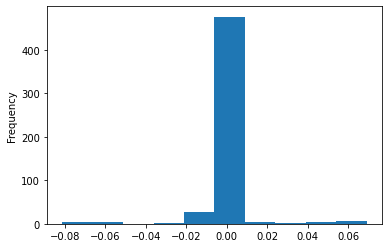

In [56]:
AAPL_val['CAR'].plot.hist()

In [57]:
prices_less.head()

,time,SPX_open,SPX_high,SPX_low,SPX_close,AAPL_open,AAPL_high,AAPL_low,AAPL_close,AAPL_vol,AAPL-1,AAPL-2,SPX-1,R_t,R_t-1,R_m
2,2019-01-02 09:32:00-05:00,2473.56,2473.56,2471.44,2471.26,155.18,155.3,154.77,154.8073,155007,154.79,154.89,2470.80,0.002520,-0.000646,0.001117
3,2019-01-02 09:33:00-05:00,2471.30,2472.88,2471.67,2469.64,154.83,154.9,154.58,154.6700,170003,155.18,154.79,2473.56,-0.002255,0.002520,-0.000914
4,2019-01-02 09:34:00-05:00,2471.88,2472.49,2471.04,2470.11,154.63,155.0,154.62,154.7500,146408,154.83,155.18,2471.30,-0.001292,-0.002255,0.000235
5,2019-01-02 09:35:00-05:00,2471.06,2471.32,2468.78,2467.47,154.78,154.8,154.30,154.5300,218226,154.63,154.83,2471.88,0.000970,-0.001292,-0.000332
6,2019-01-02 09:36:00-05:00,2468.84,2471.80,2471.80,2468.84,154.51,155.0,154.49,154.9590,179486,154.78,154.63,2471.06,-0.001744,0.000970,-0.000898


In [58]:
def CAR_perc(start, end, dataframe):
    inside = dataframe.copy()
    important = inside[(inside['time'] >= start) & (inside['time'] <= end)]
    important['AR'] = 100 * important['R_t'] - 100 * Norm_ret_params['c1'] - 100 * Norm_ret_params['a_R_t-1'] * important['R_t-1'] - 100 * Norm_ret_params['a_R_m'] * important['R_m']
    CAR = np.sum(important['AR'])
    return CAR

In [59]:
AAPL_val['CAR_perc'] = AAPL_val.apply(lambda x: CAR_perc(x['start'], x['end'], prices_less), axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [60]:
AAPL_val['CAR_perc'].describe()

count    528.000000
mean      -0.049327
std        1.235167
min       -8.131289
25%       -0.004716
50%        0.000000
75%        0.000000
max        6.918957
Name: CAR_perc, dtype: float64

In [61]:
conditions = [(AAPL_val['CAR'] <= -0.005), 
             (AAPL_val['CAR'] > -0.005) & (AAPL_val['CAR'] < 0.005),
             (AAPL_val['CAR'] >= 0.005)]

values = [-1, 0, 1]

AAPL_val['class'] = np.select(conditions, values)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [62]:
AAPL_val[['Article', 'class']].groupby('class').count()

,Article
class,
-1,44
0,448
1,33


In [63]:
biggest = AAPL_val[AAPL_val['CAR'] == np.max(AAPL_val['CAR'])]

In [64]:
biggest

,time_good,Article,ticker,time_tz,valid,start,end,CAR,CAR_perc,class
1058,2019-05-01 17:20:00+03:00,"(For a live blog on the U.S. stock market, cli...",AAPL,2019-05-01 10:20:00-04:00,True,2019-05-01 09:20:00-04:00,2019-05-01 11:20:00-04:00,0.06919,6.918957,1


In [65]:
beg_big = biggest.iloc[0][5]
end_big = biggest.iloc[0][6]
news_time_big = biggest.iloc[0][3]

for_the_big = prices_less[(prices_less['time'] >= beg_big) & (prices_less['time'] <= end_big)].copy()

In [66]:
for_the_big['diff'] = for_the_big['time'] - news_time_big

In [67]:
for_the_big['AR'] = for_the_big['R_t'] - Norm_ret_params['c1'] - Norm_ret_params['a_R_t-1'] * for_the_big['R_t-1'] - Norm_ret_params['a_R_m'] * for_the_big['R_m']
for_the_big['cumAR'] = for_the_big['AR'].cumsum()

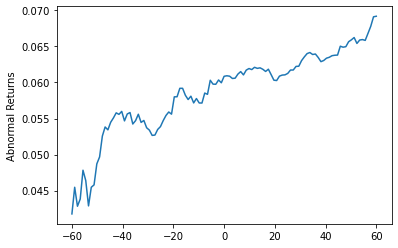

In [68]:
plt.plot(np.linspace(-60,60,len(for_the_big['cumAR'])), for_the_big['cumAR'])
plt.ylabel('Abnormal Returns')
plt.show()

In [69]:
smallest = AAPL_val[AAPL_val['CAR'] == np.min(AAPL_val['CAR'])]
smallest

,time_good,Article,ticker,time_tz,valid,start,end,CAR,CAR_perc,class
1288,2019-01-03 15:32:00+02:00,(Reuters) - Apple Inc shares plunged 10 percen...,AAPL,2019-01-03 08:32:00-05:00,True,2019-01-03 07:32:00-05:00,2019-01-03 09:32:00-05:00,-0.081313,-8.131289,-1


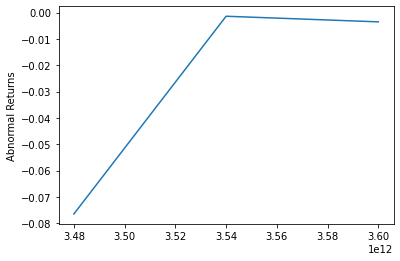

In [70]:
beg_small = smallest.iloc[0][5]
end_small = smallest.iloc[0][6]
news_time_small = smallest.iloc[0][3]

for_the_small = prices_less[(prices_less['time'] >= beg_small) & (prices_less['time'] <= end_small)].copy()
for_the_small['diff'] = for_the_small['time'] - news_time_small

for_the_small['AR'] = for_the_small['R_t'] - Norm_ret_params['c1'] - Norm_ret_params['a_R_t-1'] * for_the_small['R_t-1'] - Norm_ret_params['a_R_m'] * for_the_small['R_m']
for_the_small['cumAR'] = for_the_small['AR'].cumsum()

plt.plot(for_the_small['diff'], for_the_small['AR'])
plt.ylabel('Abnormal Returns')
plt.show()

In [71]:
AAPL_val[AAPL_val['CAR'] >= 0.005].sort_values(by = ['time_tz'], axis = 0)

,time_good,Article,ticker,time_tz,valid,start,end,CAR,CAR_perc,class
1299,2019-01-03 17:33:00+02:00,* Yen surges as much as 4.4 pct vs USD* Rush t...,AAPL,2019-01-03 10:33:00-05:00,True,2019-01-03 09:33:00-05:00,2019-01-03 11:33:00-05:00,0.019615,1.961543,1
1298,2019-01-03 17:53:00+02:00,"WASHINGTON, Jan 3 (Reuters) - A sharp drop in ...",AAPL,2019-01-03 10:53:00-05:00,True,2019-01-03 09:53:00-05:00,2019-01-03 11:53:00-05:00,0.007553,0.755281,1
1292,2019-01-03 17:55:00+02:00,WASHINGTON (Reuters) - A sharp drop in Chinese...,AAPL,2019-01-03 10:55:00-05:00,True,2019-01-03 09:55:00-05:00,2019-01-03 11:55:00-05:00,0.007990,0.798983,1
1219,2019-01-30 16:12:00+02:00,* Apple jumps on results as services business ...,AAPL,2019-01-30 09:12:00-05:00,True,2019-01-30 08:12:00-05:00,2019-01-30 10:12:00-05:00,0.037421,3.742090,1
1218,2019-01-30 16:32:00+02:00,Jan 30 (Reuters) - U.S. stocks opened higher o...,AAPL,2019-01-30 09:32:00-05:00,True,2019-01-30 08:32:00-05:00,2019-01-30 10:32:00-05:00,0.044717,4.471674,1
1215,2019-01-30 20:22:00+02:00,"(For a live blog on the U.S. stock market, cli...",AAPL,2019-01-30 13:22:00-05:00,True,2019-01-30 12:22:00-05:00,2019-01-30 14:22:00-05:00,0.007793,0.779251,1
1210,2019-02-01 16:21:00+02:00,Feb 1 (Reuters) - Apple Inc has fixed a bug th...,AAPL,2019-02-01 09:21:00-05:00,True,2019-02-01 08:21:00-05:00,2019-02-01 10:21:00-05:00,0.008107,0.810741,1
1209,2019-02-01 16:31:00+02:00,(Reuters) - Apple Inc said on Friday it has fi...,AAPL,2019-02-01 09:31:00-05:00,True,2019-02-01 08:31:00-05:00,2019-02-01 10:31:00-05:00,0.007864,0.786379,1
1124,2019-03-25 22:13:00+02:00,NaN,AAPL,2019-03-25 16:13:00-04:00,True,2019-03-25 15:13:00-04:00,2019-03-25 17:13:00-04:00,0.008601,0.860066,1
1123,2019-03-25 22:15:00+02:00,(Reuters) - Apple Inc unveiled its Apple TV+ o...,AAPL,2019-03-25 16:15:00-04:00,True,2019-03-25 15:15:00-04:00,2019-03-25 17:15:00-04:00,0.007448,0.744751,1


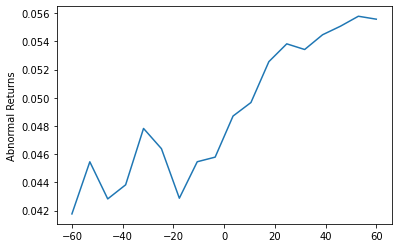

In [72]:
good = AAPL_val[(AAPL_val['CAR'] > 0.055576) & (AAPL_val['CAR'] < 0.055578)]

beg_good = good.iloc[0][5]
end_good = good.iloc[0][6]
news_time_good = good.iloc[0][3]

for_the_good = prices_less[(prices_less['time'] >= beg_good) & (prices_less['time'] <= end_good)].copy()
for_the_good['diff'] = for_the_good['time'] - news_time_good

for_the_good['AR'] = for_the_good['R_t'] - Norm_ret_params['c1'] - Norm_ret_params['a_R_t-1'] * for_the_good['R_t-1'] - Norm_ret_params['a_R_m'] * for_the_good['R_m']
for_the_good['cumAR'] = for_the_good['AR'].cumsum()

plt.plot(np.linspace(-60,60,len(for_the_good['cumAR'])), for_the_good['cumAR'])
plt.ylabel('Abnormal Returns')
plt.show()

In [73]:
for_the_good.head()

,time,SPX_open,SPX_high,SPX_low,SPX_close,AAPL_open,AAPL_high,AAPL_low,AAPL_close,AAPL_vol,AAPL-1,AAPL-2,SPX-1,R_t,R_t-1,R_m,diff,AR,cumAR
31980,2019-05-01 09:30:00-04:00,2952.33,2952.64,2952.12,2951.48,209.8800,210.6300,209.46,210.0200,1760381,200.82,200.621,2946.04,0.045115,0.000992,0.002135,0 days 00:43:00,0.041765,0.041765
31981,2019-05-01 09:31:00-04:00,2952.01,2952.43,2952.42,2951.39,210.0200,210.1500,209.23,209.5300,647181,209.88,200.820,2952.33,0.000667,0.045115,-0.000108,0 days 00:44:00,0.003697,0.045462
31982,2019-05-01 09:32:00-04:00,2952.46,2952.62,2951.96,2951.91,209.5100,209.8900,209.30,209.7107,486254,210.02,209.880,2952.01,-0.002428,0.000667,0.000152,0 days 00:45:00,-0.002632,0.042830
31983,2019-05-01 09:33:00-04:00,2952.00,2952.13,2950.81,2950.70,209.7000,210.4089,209.69,210.3713,675623,209.51,210.020,2952.46,0.000907,-0.002428,-0.000156,0 days 00:46:00,0.000999,0.043829
31984,2019-05-01 09:34:00-04:00,2950.94,2951.97,2951.51,2950.86,210.4067,210.6700,209.98,210.0931,483847,209.70,209.510,2952.00,0.003370,0.000907,-0.000359,0 days 00:47:00,0.003999,0.047827


In [75]:
!pip install bert-for-tf2
!pip install sentencepiece

try:
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf

import tensorflow_hub as hub

from tensorflow.keras import layers
import bert
import re

     |████████████████████████████████| 51kB 2.5MB/s 
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-cp37-none-any.whl size=30535 sha256=fd4b04c0b64dfbdcca7e5f19514ac46daf9b92dc749be3a9415b47bace39ac71
  Stored in directory: /root/.cache/pip/wheels/a1/04/ee/347bd9f5b821b637c76411d280271a857aece00358896a230f
  Created wheel for py-params: filename=py_params-0.10.2-cp37-none-any.whl size=7912 sha256=6f5b829aafe5284990bcf50daff566876d80e41dd738e1e5dfbe5c6238d2f7be
  Stored in directory: /root/.cache/pip/wheels/d0/4a/70/ff12450229ff1955abf01f365051d4faae1c20aef53ab4cf09
  Created wheel for params-flow: filename=params_flow-0.8.2-cp37-none-any.whl size=19472 sha256=1cf67d9b748d3882974276ef17fa0ea84cbf243b184e84d7cc1113ca3c27c981
  Stored in directory: /root/.cache/pip/wheels/08/c8/7f/81c86b9ff2b86e2c477e3914175be03e679e596067dc630c06
Successfully built bert-for-tf2 py-params params-flow
     |████████████████████████████████| 1.2MB 6.0MB/s 


In [76]:
AAPL_val['typ'] = AAPL_val['Article'].apply(type)

AAPL_val = AAPL_val[AAPL_val['typ'] != float]


TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [77]:
Articles = []
sentences = list(AAPL_val['Article'])
for sen in sentences:
    Articles.append(preprocess_text(sen))

In [78]:
y_bert = np.array(AAPL_val['class'])

In [79]:
len(y_bert) == len(Articles)

True

In [80]:
Articles[0]

'LISBON Reuters Apple Pay has attracted regulatory scrutiny as result of several expressions of concern about the S tech giant mobile payment service Europe antitrust chief said on Thursday Margrethe Vestager comments come after an EU questionnaire seen by Reuters late last month showed EU regulators had asked online merchants whether they had been told to use Apple Pay instead of competing services We ve been asking quite number of questions because we get many many concerns when it comes to Apple Pay for pure competition reasons said EU Competition Commissioner Vestager without specifying who had expressed concern People see it becomes increasingly difficult to compete in the market for easy payments she told news briefing at the Web Summit tech conference in Lisbon In an interview with Reuters last year Vestager said she might investigate Apple Pay if there were formal complaints At least one party has gone to the European Commission with its grievance two people familiar with the m

In [81]:
BertTokenizer = bert.bert_tokenization.FullTokenizer
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",
                            trainable=False)
vocabulary_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
to_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = BertTokenizer(vocabulary_file, to_lower_case)


In [82]:
bert_model_name = 'bert_en_uncased_L-12_H-768_A-12' 

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [84]:
!pip install tensorflow-text

import tensorflow_text as text

bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

     |████████████████████████████████| 3.4MB 5.2MB/s 


In [85]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [120]:
def build_classifier_model():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=False, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    net = outputs['pooled_output']
    net = tf.keras.layers.Dropout(0.1)(net)
    net = tf.keras.layers.Dense(3, activation=None, name='classifier')(net)
    return tf.keras.Model(text_input, net)

In [121]:
classifier_model = build_classifier_model()

In [122]:
text_test = ['this is such an amazing movie!']

bert_raw_result = classifier_model(tf.constant(text_test))
print(tf.sigmoid(bert_raw_result))

tf.Tensor([[0.53981006 0.4244268  0.4581583 ]], shape=(1, 3), dtype=float32)


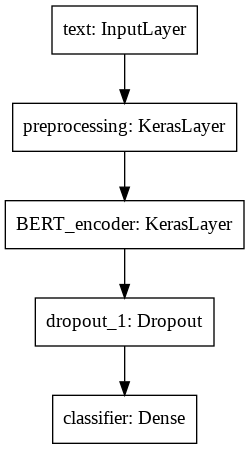

In [123]:
tf.keras.utils.plot_model(classifier_model)

In [124]:
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
metrics = tf.keras.metrics.CategoricalAccuracy()

In [125]:
X = np.array(Articles)
from sklearn.model_selection import train_test_split

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y_bert, test_size=0.3)

In [127]:
optimizer = tf.keras.optimizers.Adam()
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [128]:
y_bert

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  1, -1,  0,  0,  1,  0, -1, -1,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  1,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  1,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  1,  0, -1,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  0, -1,  0

In [129]:
y_true = []
for inst in y_bert:
  if inst == -1:
    y_true.append([1, 0, 0])
  elif inst == 0:
    y_true.append([0, 1, 0])
  else:
    y_true.append([0, 0, 1])


In [135]:
y_true = np.array(y_true)

X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.3)

In [131]:
classifier_model.fit(x = X, y = y_true, epochs = 5, validation_split = 0.3)

Epoch 1/5
12/12 [==============================] - 248s 20s/step - loss: 0.7475 - categorical_accuracy: 0.7079 - val_loss: 0.5964 - val_categorical_accuracy: 0.8544
Epoch 2/5
12/12 [==============================] - 236s 20s/step - loss: 0.5985 - categorical_accuracy: 0.8429 - val_loss: 0.5284 - val_categorical_accuracy: 0.8544
Epoch 3/5
12/12 [==============================] - 231s 20s/step - loss: 0.5495 - categorical_accuracy: 0.8629 - val_loss: 0.5129 - val_categorical_accuracy: 0.8544
Epoch 4/5
12/12 [==============================] - 231s 20s/step - loss: 0.5390 - categorical_accuracy: 0.8526 - val_loss: 0.5165 - val_categorical_accuracy: 0.8544
Epoch 5/5
12/12 [==============================] - 232s 20s/step - loss: 0.5366 - categorical_accuracy: 0.8501 - val_loss: 0.5133 - val_categorical_accuracy: 0.8544


In [136]:
loss, accuracy = classifier_model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')

5/5 [==============================] - 71s 14s/step - loss: 0.5068 - categorical_accuracy: 0.8544
Accuracy: 0.8544303774833679
